In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pandas as pd 
import numpy as np

In [8]:
def get_data(token):
    if (token=='FLOW'):
        res = requests.get(
            f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
            }
        )
    else:
        res = requests.get(
            f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
            }
        )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [9]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT',"FLOW"]


In [10]:
df_base = [get_data(token) for token in tokens]
df_base[0]

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
512,2021-12-13 08:00:00,3991.95,4010.00,3975.00,3988.89,5496.697976,2.195192e+07,ETH
513,2021-12-13 09:00:00,3988.90,4033.89,3952.00,4022.19,5492.298761,2.198549e+07,ETH
514,2021-12-13 10:00:00,4021.94,4022.63,3989.93,4001.58,1973.178366,7.898557e+06,ETH
515,2021-12-13 11:00:00,4001.34,4010.86,3980.60,3997.43,1887.288117,7.540203e+06,ETH


Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [12]:
USD_Volume=pd.DataFrame(index=[tokens],columns=["USD_V"])

In [13]:
for i in range(len(tokens)):
    USD_Volume.iloc[i,0]=df_base[i].volumeUSD.sum()

In [14]:
USD_Volume.sort_values(by='USD_V',ascending=False)

,USD_V
ETH,19881216265.634323
SOL,6523768510.372992
AVAX,3304370079.38185
USDT,1906532691.789932
FLOW,82819174.744913


Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [33]:
data_corr_ETH_SOL=df_base[0].set_index('ts')['close'].rename('ETH').to_frame().join(
    df_base[1].set_index('ts')['close'].rename("SOL").to_frame()
)
data_corr_ETH_SOL['ratio']=data_corr_ETH_SOL['ETH']/data_corr_ETH_SOL['SOL']
data_corr_ETH_SOL

,ETH,SOL,ratio
ts,,,
2021-11-22 00:00:00,4262.99,230.785,18.471694
2021-11-22 01:00:00,4234.37,226.000,18.736150
2021-11-22 02:00:00,4217.89,227.037,18.577985
2021-11-22 03:00:00,4193.47,223.117,18.794937
2021-11-22 04:00:00,4168.35,220.652,18.891059
...,...,...,...
2021-12-11 03:00:00,3992.21,168.010,23.761740
2021-12-11 04:00:00,4010.77,170.270,23.555353
2021-12-11 05:00:00,4034.52,170.960,23.599204


In [15]:
for i in range(len(df_base)):
    df_base[i].rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    },inplace=True
)

In [16]:
df_base[0]

,ts,open,high,low,close,volumeBase,volumeTerm,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
512,2021-12-13 08:00:00,3991.95,4010.00,3975.00,3988.89,5496.697976,2.195192e+07,ETH
513,2021-12-13 09:00:00,3988.90,4033.89,3952.00,4022.19,5492.298761,2.198549e+07,ETH
514,2021-12-13 10:00:00,4021.94,4022.63,3989.93,4001.58,1973.178366,7.898557e+06,ETH
515,2021-12-13 11:00:00,4001.34,4010.86,3980.60,3997.43,1887.288117,7.540203e+06,ETH


create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [17]:
data=pd.concat([df_base[i].set_index('ts').rename(columns={'close':tokens[i]})\
           [[tokens[i]]] for i in range(len(tokens))],axis=1).head(200).dropna()

In [18]:
data

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-11-30 03:00:00,4469.98,204.553,120.01,1.0010,12.755
2021-11-30 04:00:00,4439.05,203.908,118.27,1.0009,12.610
2021-11-30 05:00:00,4448.00,204.641,119.50,1.0010,12.586


In [19]:
returns=np.log(data/data.shift(1))
returns

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
...,...,...,...,...,...
2021-11-30 03:00:00,0.001316,-0.002076,-0.003909,-0.0001,0.002826
2021-11-30 04:00:00,-0.006944,-0.003158,-0.014605,-0.0001,-0.011433
2021-11-30 05:00:00,0.002014,0.003588,0.010346,0.0001,-0.001905


In [20]:
returns.corr()

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.833941,0.606741,-0.119490,0.391746
SOL,0.833941,1.000000,0.622749,-0.065401,0.314586
AVAX,0.606741,0.622749,1.000000,-0.024824,0.157793
USDT,-0.119490,-0.065401,-0.024824,1.000000,-0.042435
FLOW,0.391746,0.314586,0.157793,-0.042435,1.000000


<AxesSubplot:>

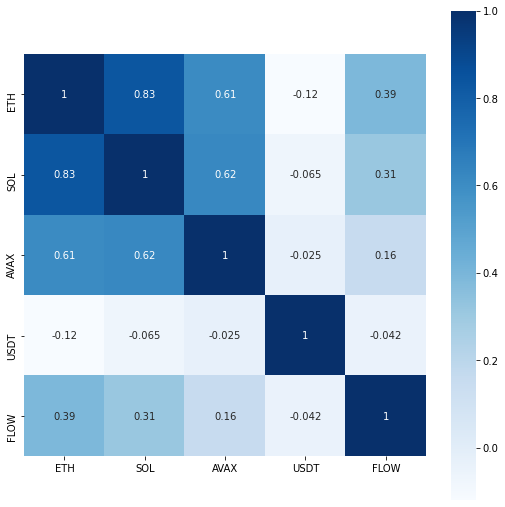

In [21]:
dfData = returns.corr()
plt.subplots(figsize=(9, 9)) # 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
